# Лабораторная работа №5: Логистическая регрессия и Решающие деревья

## 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
import graphviz

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")


Размер обучающей выборки: 614 строк
Размер тестовой выборки: 154 строк


## Задача 1: Классификация методами логистической регрессии и решающих деревьев (стандартные настройки)

In [2]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("--- Логистическая регрессия ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

print("\n--- Решающее дерево (стандартные настройки) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_dec_tree))

--- Логистическая регрессия ---
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


--- Решающее дерево (стандартные настройки) ---
Accuracy: 0.7272727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



### Вывод по Задаче 1:
Решающее дерево со стандартными настройками показывает незначительно лучшую производительность 

## Задача 2: Исследование зависимости метрики от глубины решающего дерева

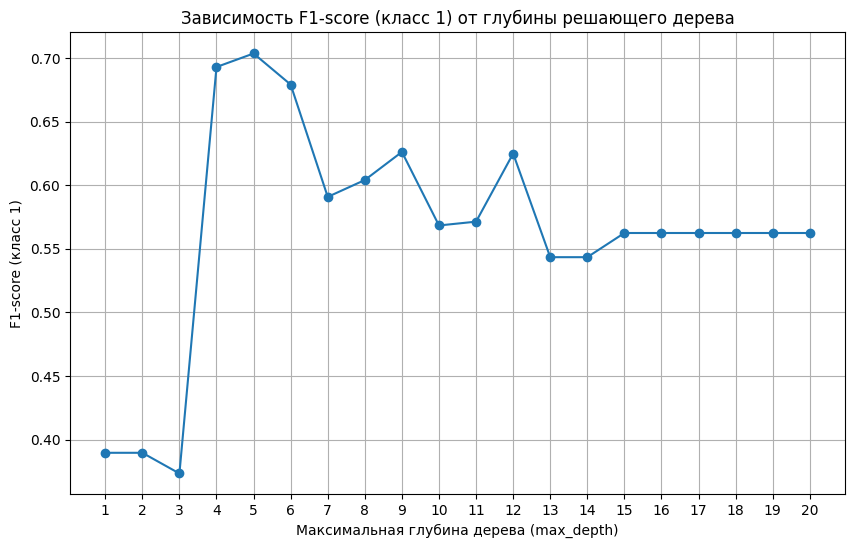

Оптимальная глубина дерева по F1-score для класса 1: 5
Максимальное значение F1-score для класса 1: 0.7037


In [3]:
depths = range(1, 21)
f1_scores_class1 = []

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_scores_class1.append(report['1']['f1-score'])

plt.figure(figsize=(10, 6))
plt.plot(depths, f1_scores_class1, marker='o', linestyle='-')
plt.title('Зависимость F1-score (класс 1) от глубины решающего дерева')
plt.xlabel('Максимальная глубина дерева (max_depth)')
plt.ylabel('F1-score (класс 1)')
plt.xticks(depths)
plt.grid(True)
plt.show()

optimal_depth = depths[np.argmax(f1_scores_class1)]
print(f"Оптимальная глубина дерева по F1-score для класса 1: {optimal_depth}")
print(f"Максимальное значение F1-score для класса 1: {max(f1_scores_class1):.4f}")

## Задача 3: Анализ модели с оптимальной глубиной

--- Решающее дерево (оптимальная глубина = 5) ---
Accuracy: 0.7922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154


Визуализация дерева (может потребоваться установка graphviz):
Дерево сохранено в файл 'diabetes_tree_depth_5.png'


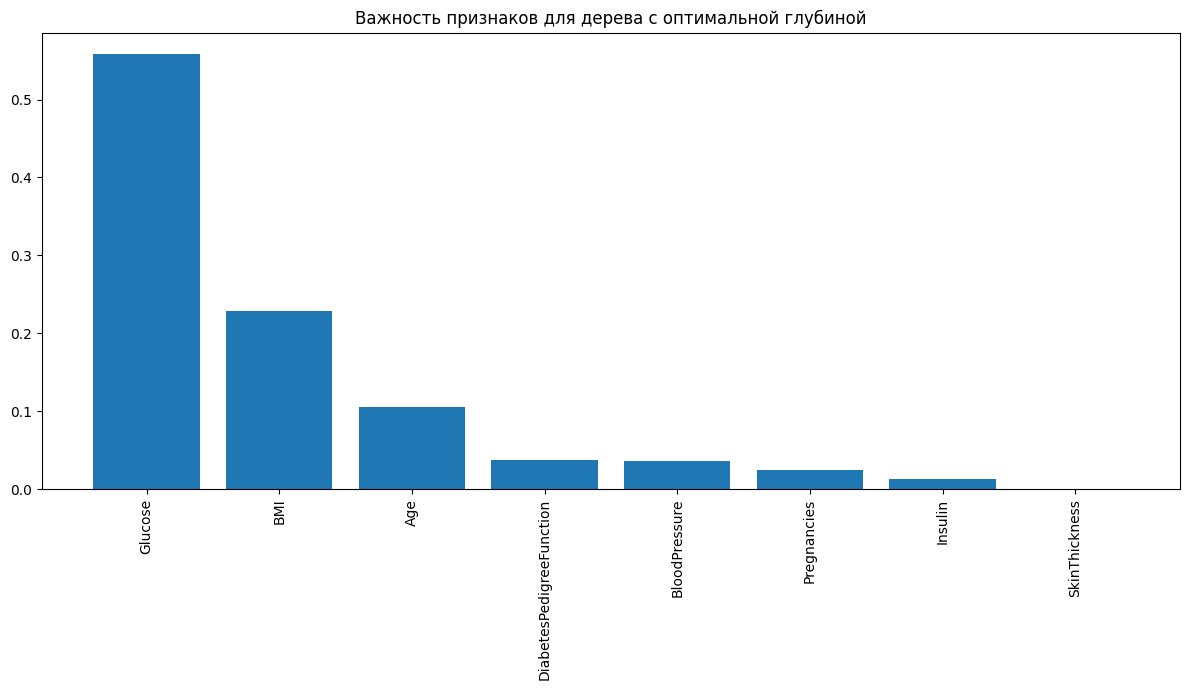

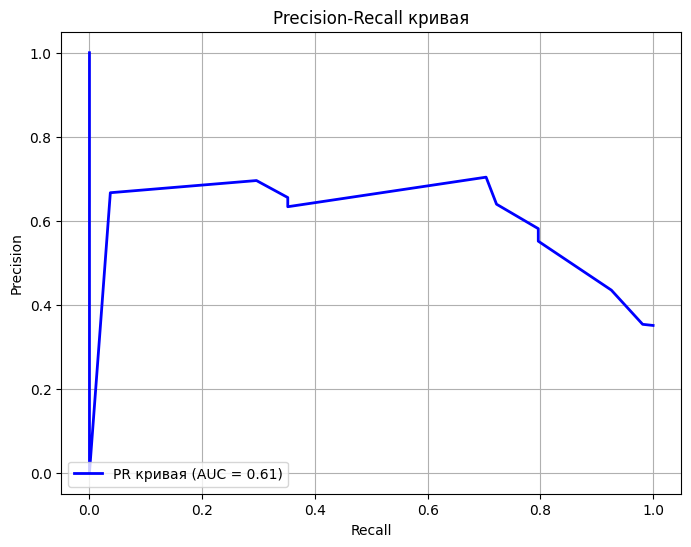

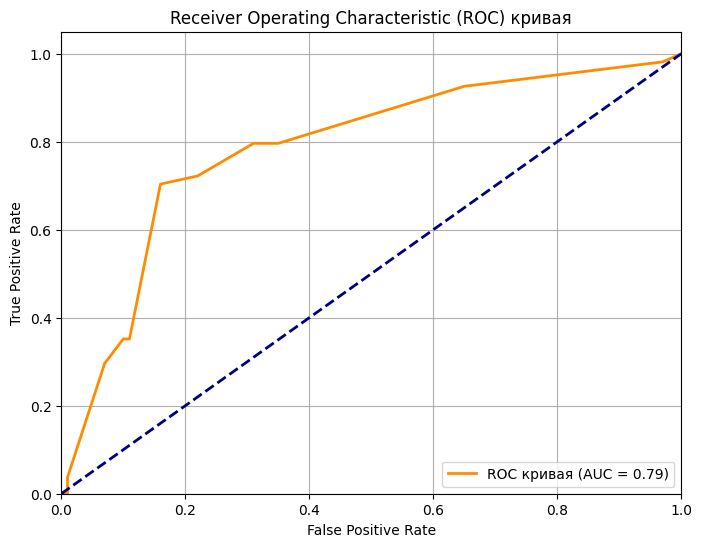

In [ ]:
optimal_dt_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_dt_model.fit(X_train, y_train)
y_pred_optimal_dt = optimal_dt_model.predict(X_test)
y_proba_optimal_dt = optimal_dt_model.predict_proba(X_test)[:, 1]

print(f"--- Решающее дерево (оптимальная глубина = {optimal_depth}) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_optimal_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_optimal_dt))

dot_data = export_graphviz(optimal_dt_model, out_file=None, 
                           feature_names=X_train.columns,
                           class_names=['Здоров (0)', 'Болен (1)'],
                           filled=True, rounded=True, 
                           special_characters=True)
graph = graphviz.Source(dot_data)
print("\nВизуализация дерева (может потребоваться установка graphviz):")
graph.render(f"diabetes_tree_depth_{optimal_depth}", format='png', cleanup=True)
print(f"Дерево сохранено в файл 'diabetes_tree_depth_{optimal_depth}.png'")

importances = optimal_dt_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 7))
plt.title("Важность признаков для дерева с оптимальной глубиной")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba_optimal_dt)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR кривая (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_optimal_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Задача 4 (Опционально): Исследование зависимости метрики от других параметров (например, `max_features`)


--- Исследование max_features ---


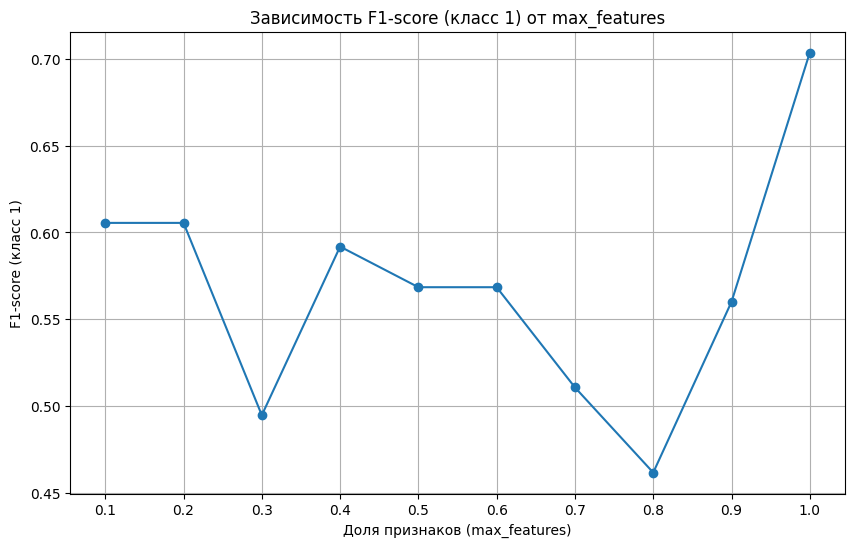

Оптимальное значение max_features по F1-score для класса 1: 1.00
Максимальное значение F1-score для класса 1 при этом: 0.7037


In [ ]:
max_features_options = np.linspace(0.1, 1.0, 10)
f1_scores_max_features = []

print("\n--- Исследование max_features ---")
for mf_option in max_features_options:
    dt_model_mf = DecisionTreeClassifier(max_depth=optimal_depth, max_features=mf_option, random_state=42)
    dt_model_mf.fit(X_train, y_train)
    y_pred_mf = dt_model_mf.predict(X_test)
    report_mf = classification_report(y_test, y_pred_mf, output_dict=True)
    f1_scores_max_features.append(report_mf['1']['f1-score'])

plt.figure(figsize=(10, 6))
plt.plot(max_features_options, f1_scores_max_features, marker='o', linestyle='-')
plt.title('Зависимость F1-score (класс 1) от max_features')
plt.xlabel('Доля признаков (max_features)')
plt.ylabel('F1-score (класс 1)')
plt.xticks(max_features_options)
plt.grid(True)
plt.show()

optimal_max_features = max_features_options[np.argmax(f1_scores_max_features)]
print(f"Оптимальное значение max_features по F1-score для класса 1: {optimal_max_features:.2f}")
print(f"Максимальное значение F1-score для класса 1 при этом: {max(f1_scores_max_features):.4f}")